### Import packages

In [1]:
import sys
sys.path.append('../data_helpers/')
sys.path.append('../statistics/')
sys.path.append('../preprocess')
sys.path.append('../cluster/')

In [2]:
from twitter_data_helper import TwitterDataHelper
from reddit_data_helper import RedditDataHelper
from data_aggregator import DataAggregator
from statistics_aggregator import StatisticsAggregator
from text_cleaner import TextCleaner
from lda_cluster import LDACluster
from data_enhancer import DataOrganizer, SummarizeNER

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import numpy as np
import pandas as pd
import json
import pickle
from time import time, sleep
from tqdm import tqdm

In [4]:
try:
    if text_cleaner:
        pass
except:
    from text_cleaner import TextCleaner
    text_cleaner = TextCleaner(filter_sentiment_words=True)

* [TextCleaner] Initializing...
* [TextCleaner] Loading SpaCy "en_core_web_md" corpus...
* [TextCleaner] Loading stopwords...
* [TextCleaner] Loading sentinent words...
--------------------------------------------------------------------------------------------------------------------


In [5]:
from gensim.corpora import Dictionary

### Get data

In [6]:
data_helper = DataAggregator()
date_range = ['2017-08-25']
df = data_helper.get_data(date_range=date_range)

In [7]:
df['source'].value_counts()

reddit    78
Name: source, dtype: int64

In [8]:
df[['source', 'created_at', 'author', 'text', 'url']]

,source,created_at,author,text,url
0,reddit,2017-08-25,MachineLearning | coolio777,[D] What value does Machine Learning have to a...,https://www.reddit.com/r/MachineLearning/comme...
1,reddit,2017-08-25,dataisbeautiful | snkn179,Variations in word usage throughout Australia,https://lingroadshow.com/resources/englishes-i...
2,reddit,2017-08-25,dataisbeautiful | AllSignalNoNoise,Flagship Smartphones Compared as of 05/2017 [OC],https://public.tableau.com/shared/Z8SP5D8FJ?:d...
3,reddit,2017-08-25,dataisbeautiful | jeffreylancaster,An Interactive Game of Thrones Narrative Chart...,https://jeffreylancaster.github.io/game-of-thr...
4,reddit,2017-08-25,datascience | kuno83,Livestream at 6:30pm PDT: Using Scattertext an...,https://livestream.com/metis/events/7617460
5,reddit,2017-08-25,MachineLearning | ov3rsight,[D] Should I take a Machine Learning course in...,https://www.reddit.com/r/MachineLearning/comme...
6,reddit,2017-08-25,datascience | maxmoo,Are Data Scientists at Facebook really Data An...,https://www.reddit.com/r/datascience/comments/...
7,reddit,2017-08-25,dataisbeautiful | myDataTraining,"""Definitive"" Ranking of All Comics Adaptations...",https://public.tableau.com/views/DefinitiveRan...
8,reddit,2017-08-25,dataisbeautiful | MrGreyMan,Watch Hurricane Harvey in Real Time using WindMap,https://earth.nullschool.net/#current/wind/sur...
9,reddit,2017-08-25,dataisbeautiful | TarekVilela,"17 groups, 10 pictures and guessing ages [OC]",https://i.redd.it/ke6cj0u00shz.png


### Clean text

In [9]:
texts = df['text']

In [28]:
text_cleaner.token_blacklist.append('oc')
docs = text_cleaner.clean(texts)

78it [00:00, 980.05it/s]

* [TextCleaner] Cleaning text...


### Word Cloud (Show Top K words)
- K = vocabulary numbers / 2

In [29]:
from gensim.corpora import Dictionary
vocab = Dictionary(docs)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=int(len(vocab)*0.5), background_color='white', width=600, height=300, max_font_size=50).generate(' '.join([' '.join(doc) for doc in docs]))

(-0.5, 599.5, 299.5, -0.5)

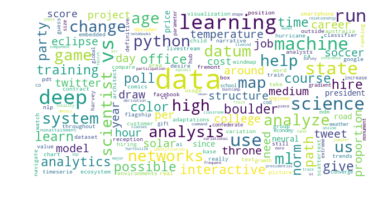

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## LDA - Topic Clustering

In [31]:
cluster = LDACluster(num_topics=10)
cluster.fit(docs)
cluster.model.print_topics()

* [LDA] Training model...


[(0,
  '0.029*"data" + 0.021*"analysis" + 0.015*"learning" + 0.014*"deep" + 0.014*"science" + 0.013*"age" + 0.013*"help" + 0.013*"datum" + 0.012*"twitter" + 0.012*"day"'),
 (1,
  '0.028*"system" + 0.026*"data" + 0.019*"deep" + 0.018*"science" + 0.017*"vs" + 0.017*"game" + 0.015*"analysis" + 0.015*"learn" + 0.015*"color" + 0.014*"mxnet"'),
 (2,
  '0.022*"road" + 0.021*"data" + 0.016*"learning" + 0.015*"science" + 0.015*"machine" + 0.014*"python" + 0.013*"game" + 0.013*"us" + 0.013*"run" + 0.012*"system"'),
 (3,
  '0.022*"data" + 0.018*"deep" + 0.017*"vs" + 0.016*"networks" + 0.016*"neural" + 0.012*"learning" + 0.011*"science" + 0.011*"machine" + 0.010*"use" + 0.010*"python"'),
 (4,
  '0.040*"data" + 0.018*"high" + 0.017*"give" + 0.017*"career" + 0.017*"structure" + 0.017*"proportion" + 0.013*"learning" + 0.012*"deep" + 0.011*"age" + 0.011*"analyze"'),
 (5,
  '0.025*"run" + 0.018*"vs" + 0.017*"ml" + 0.017*"state" + 0.016*"change" + 0.016*"soccer" + 0.016*"boulder" + 0.016*"map" + 0.010*"

### Topic distribution

In [14]:
df['cluster'] = cluster.labels
df['cluster'].value_counts()

6    15
0    11
4    10
8     9
1     8
3     7
9     6
7     5
5     4
2     3
Name: cluster, dtype: int64

### Post type distribution

In [34]:
stats_helper = StatisticsAggregator(df)
sdf = stats_helper.get_stats()

In [35]:
sdf['type'].value_counts()

unknown link                          30
image                                 15
subreddit: /r/datascience              6
blog                                   5
subreddit: /r/MachineLearning          5
subreddit: /r/learnmachinelearning     3
code                                   3
news                                   2
tutorial                               2
twitter status                         1
social-media                           1
subreddit: /r/LanguageTechnology       1
paper                                  1
subreddit: /r/MLjobs                   1
subreddit: /r/BigDataJobs              1
subreddit: /r/computervision           1
Name: type, dtype: int64

### Cross relation between post type and post sentiment

In [36]:
pd.crosstab(sdf.type,sdf.sentiment)

sentiment,neu
type,
blog,5
code,3
image,15
news,2
paper,1
social-media,1
subreddit: /r/BigDataJobs,1
subreddit: /r/LanguageTechnology,1
subreddit: /r/MLjobs,1


### Blog

In [37]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'blog'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [D] Andrew Ng's "Structuring a ML Project" summary in a diagram
* Link: https://medium.com/@erogol/designing-a-deep-learning-project-9b3698aef127
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: There are more than 140 attempts to access porn and other inappropriate content within the average enterprise every single day.
* Link: https://www.wandera.com/blog/inappropriate-mobile-activity/
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Global Extreme Weather Costs [OC]
* Link: http://blog.cityprojections.com/2017/08/how-much-does-extreme-weather-currently.html
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Mapping the sentiment of tweets during a soccer game as goals for each side are scored
* Link: https://www.brandwatch.com/blog/react-soccer-data/?utm_

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Code

In [38]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'code'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: An Interactive Game of Thrones Narrative Chart in d3 (with timeseries dataset) [OC]
* Link: https://jeffreylancaster.github.io/game-of-thrones/
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: [P] Factorization Machine PyTorch layer, with cythonized forward/backward passes
* Link: https://github.com/jmhessel/fmpytorch
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Floydhub Documentation- A cloud platform to run various ML models
* Link: https://code4cx.github.io/floydhub-documentation.html
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### News

In [39]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'news'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: The Shape of Happiness: The Relationship Between Happiness and Age in seven major surveys.
* Link: https://www.washingtonpost.com/news/wonk/wp/2017/08/24/under-50-you-still-havent-hit-rock-bottom-happiness-wise/?hpid=hp_hp-more-top-stories-2_happiness-150p%3Ahomepage%2Fstory
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: How To Sack Top Big Data Jobs
* Link: http://www.technewsncareer.com/2017/06/how-to-sack-top-big-data-jobs.html
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Paper

In [40]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'paper'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [R] Twin Networks: Using the Future as a Regularizer
* Link: https://arxiv.org/abs/1708.06742
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Tutorial

In [41]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'tutorial'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: [D] CVPR tutorial on "Mathematics of Deep Learning"
* Link: https://www.youtube.com/watch?v=Mdp9uC3gXUU
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Beehexa Csv Database Synchronization
* Link: https://www.youtube.com/attribution_link?a=Qe86ReOuTJ0&u=%2Fwatch%3Fv%3DACmINtf8BlA%26feature%3Dshare
------------------------------------------------------------------------------------------


/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Image

In [42]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['type'] == 'image'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: Animated world population 1950-2100. [OC]
* Link: https://i.redd.it/ga9btbblynhz.gif
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: All the roads and nothing but the roads [OC]
* Link: https://i.redd.it/fziffv2qjnhz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Careers with the highest proportion of men and careers with the highest proportion of women [OC]
* Link: https://i.redd.it/mlru2wsvpphz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: 5 years worth of running data, speed vs distance [OC]
* Link: https://i.redd.it/1flqgsg8gqhz.png
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Air temperature in path of totality during Solar Eclipse in Hartsville, TN [OC]
* Link: htt

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Sentiment Distribution

In [43]:
sdf['sentiment'].value_counts()

neu    78
Name: sentiment, dtype: int64

### Positive posts

In [44]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'pos'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### Negative posts

In [45]:
for i, row in sdf.sort_values('hotness', ascending=False)[sdf['sentiment'] == 'neg'].iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

/Users/Howard/anaconda/envs/digestant/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### All posts ranked by "hotness"

In [46]:
for i, row in sdf.sort_values('hotness', ascending=False).iterrows():
    print('* Date: {}'.format(row['created_at']))
    print('* Text: {}'.format(row['text']))
    print('* Link: {}'.format(row['url']))
    print('-'*90)

* Date: 2017-08-25
* Text: Animated world population 1950-2100. [OC]
* Link: https://i.redd.it/ga9btbblynhz.gif
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: All the roads and nothing but the roads [OC]
* Link: https://i.redd.it/fziffv2qjnhz.jpg
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Watch Hurricane Harvey in Real Time using WindMap
* Link: https://earth.nullschool.net/#current/wind/surface/level/orthographic=-94.26,27.86,2381
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Size of US states by their economy and color coded by their growth
* Link: https://howmuch.net/articles/the-current-state-of-usa-economy
------------------------------------------------------------------------------------------
* Date: 2017-08-25
* Text: Careers with the highest proportion of men an

## Extract keywords (name entities) from text

In [47]:
se = SummarizeNER(sdf)

In [48]:
for i, phrase in enumerate(se.cleaned_phrases):
    if type(phrase) == tuple and phrase != 'N/A':
        print(i, phrase[0])

1 Australia
6 Facebook
7 Box Office Run OC
10 MDM Customer Data Hub
11 Google Trends Data
14 Boulder AI Hiring CV ML Embedded Engineer Boulder CO
15 Global
17 US
27 Party Identification OC
28 Python for Data Science and Machine Learning Bootcamp
29 Classroom Participation
30 Hartsville TN OC
31 Data Analysis Course Help
37 Trump
38 Trump s Advisory Councils OC
39 Analyzing Top
41 San Francisco
45 Trump Russia
49 Data Science vs Informatics
55 Soccer Power Index Scores OC
56 Columbia MS
57 Trump
59 Canada
61 US
67 United States Party
68 US
70 UK
75 Andrew Ng
